In [1]:
# Machine Learning Student Performance Classification Project

# Cell 1: Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')


In [2]:
# Cell 2: Load Dataset
# Replace with the correct path if needed
data = pd.read_csv("AI-Data.csv")
data.head()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


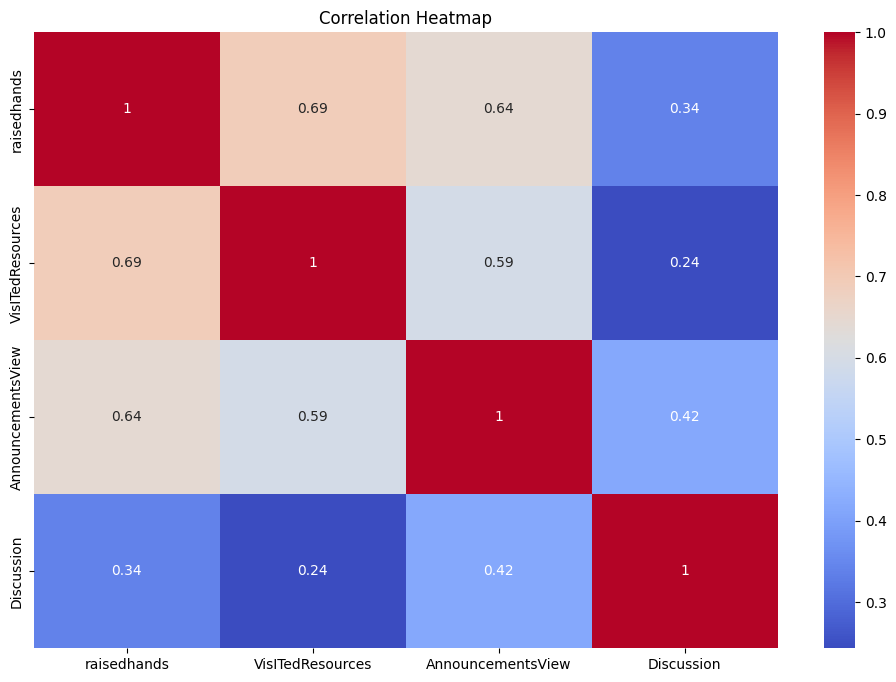

In [3]:
# Cell 3: Correlation Heatmap and Initial EDA
plt.figure(figsize=(12, 8))
sb.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


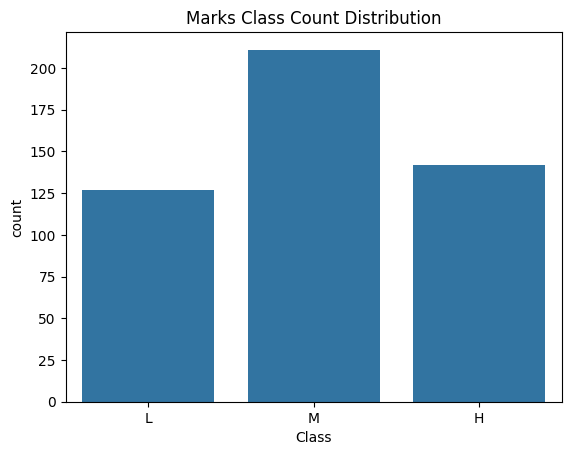

In [4]:
# Cell 4: Distribution Visualizations

# Example: Class count distribution
sb.countplot(x='Class', data=data, order=['L', 'M', 'H'])
plt.title("Marks Class Count Distribution")
plt.show()


In [5]:
# Cell 5: Data Preprocessing
# Drop non-informative or high cardinality columns if necessary based on domain knowledge
to_drop = ['gender','StageID','GradeID','NationalITy','PlaceofBirth',
           'SectionID','Topic','Semester','Relation',
           'ParentschoolSatisfaction','ParentAnsweringSurvey',
           'AnnouncementsView']
data = data.drop(columns=to_drop, errors="ignore")

# Optional: Replace GradeID with numeric codes if present earlier in pipeline
gradeID_dict = {
    "G-01" : 1, "G-02" : 2, "G-03" : 3, "G-04" : 4, "G-05" : 5, "G-06" : 6,
    "G-07" : 7, "G-08" : 8, "G-09" : 9, "G-10" : 10, "G-11" : 11, "G-12" : 12
}
data.replace({"GradeID": gradeID_dict}, inplace=True)

# Encode categorical columns
for column in data.columns:
    if data[column].dtype == object:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
data = shuffle(data)
data.reset_index(drop=True, inplace=True)


In [6]:
# Cell 6: Split Features and Labels

# Assuming the Class label is the last column after preprocessing
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

split_idx = int(len(data) * 0.70)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [7]:
# Cell 7: Model Training and Evaluation

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Perceptron": Perceptron(),
    "Logistic Regression": LogisticRegression(),
    "MLP Classifier (Neural Net)": MLPClassifier(activation="logistic", max_iter=500)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} - Classification Report")
    print(classification_report(y_test, y_pred))
    accuracy = np.mean(y_pred == y_test)
    print(f"Accuracy: {round(accuracy, 3)}\n")



Decision Tree - Classification Report
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        43
           1       0.76      0.74      0.75        38
           2       0.63      0.60      0.62        63

    accuracy                           0.67       144
   macro avg       0.68      0.68      0.68       144
weighted avg       0.67      0.67      0.67       144

Accuracy: 0.667


Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        43
           1       0.80      0.84      0.82        38
           2       0.70      0.67      0.68        63

    accuracy                           0.72       144
   macro avg       0.73      0.74      0.73       144
weighted avg       0.72      0.72      0.72       144

Accuracy: 0.722


Perceptron - Classification Report
              precision    recall  f1-score   support

           0       0.44      0.86  

In [8]:
# Cell 8: Interactive Prediction (Demo)
# Demonstration using sample input. Adapt for use in ipywidgets for full-interactive notebook.
sample_input = np.array([5, 10, 3, 1])  # Example, modify according to dataset columns
for name, model in models.items():
    pred = model.predict(sample_input.reshape(1, -1))[0]
    print(f"{name}: Predicted Class = {pred}")


Decision Tree: Predicted Class = 1
Random Forest: Predicted Class = 1
Perceptron: Predicted Class = 2
Logistic Regression: Predicted Class = 1
MLP Classifier (Neural Net): Predicted Class = 1
